In [7]:
from vedo import embedWindow
embedWindow(None)

from brainrender import Scene
import brainrender
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.getcwd()

'C:\\Users\\thoma\\Documents\\M1_Neurasmus\\NeuroBIM_M1\\Internship\\GitRepo\\PathoSpreading'

In [4]:
data_cpu = pd.read_csv('../output/predicted_pathology.csv')
data_sn = pd.read_csv('../output/predicted_pathology_seedSN.csv')

In [5]:
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')

In [6]:
data_cpu.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions
0,0,0.285313,0.354758,0.348739,iCg
1,1,0.012263,0.058409,0.128091,iAcb
2,2,0.013305,0.053030,0.100022,iTC
3,3,0.352187,0.395984,0.371742,iAI
4,4,0.250713,0.312540,0.317882,iAI-b


In [259]:
data_sn.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions
0,0,0.008845,0.008603,0.007665,iCg
1,1,0.005131,0.005171,0.006329,iAcb
2,2,0.001784,0.003589,0.004973,iTC
3,3,0.009712,0.008937,0.007834,iAI
4,4,0.008095,0.008077,0.007498,iAI-b


In [260]:
reg_names.head()

,BrainR,ROInames,Side
0,ACA,iCg,ispi
1,ACB,iAcb,ispi
2,LHA,iTC,ispi
3,VMH,iTC,ispi
4,AHN,iTC,ispi


# Matching Predicted Values and BrainRender name - Seed CPu

In [261]:
for r in data_cpu.index:
    
    names = reg_names[reg_names['ROInames'] == data_cpu.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_cpu.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_cpu.loc[r, 'br_regions'] = names.values

In [262]:
for r in data_cpu.index:
    
    if data_cpu.loc[r, 'regions'][0] == 'i':
        data_cpu.loc[r, 'hem'] = 'right'
    elif data_cpu.loc[r, 'regions'][0] == 'c':
        data_cpu.loc[r, 'hem'] = 'left' 

In [263]:
data_cpu.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions,br_regions,hem
0,0,0.285313,0.354758,0.348739,iCg,ACA,right
1,1,0.012263,0.058409,0.128091,iAcb,ACB,right
2,2,0.013305,0.053030,0.100022,iTC,LHA,right
3,3,0.352187,0.395984,0.371742,iAI,AId,right
4,4,0.250713,0.312540,0.317882,iAI-b,GU,right


# Matching Predicted Values and BrainRender name - Seed SN

In [264]:
for r in data_sn.index:
    
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values   

In [265]:
for r in data_sn.index:
    
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left'

In [266]:
data_sn.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions,br_regions,hem
0,0,0.008845,0.008603,0.007665,iCg,ACA,right
1,1,0.005131,0.005171,0.006329,iAcb,ACB,right
2,2,0.001784,0.003589,0.004973,iTC,LHA,right
3,3,0.009712,0.008937,0.007834,iAI,AId,right
4,4,0.008095,0.008077,0.007498,iAI-b,GU,right


In [267]:
data_cpu['MPI6'].values

array ([ 0.34873911 , 0.12809078 , 0.10002194 , 0.37174228 , 0.31788227 ,
 0.35970422 , 0.28161834 , 0.25526994 , 0.34125878 , 0.34984715 ,
 0.33553329 , 0.23668824 , 0.28007435 , 0.30945153 , 0.21161572 ,
 0.69877239 , 0.08518221 , 0.06991923 , 0.24223515 , 0.27198864 ,
 0.26030712 , 0.23780731 , 0.24506831 , 0.07639144 , 0.35301593 ,
 0.29470571 , 0.08129546 , 0.19551747 , 0.36166208 , 0.33486466 ,
 0.34904556 , 0.12158366 , 0.13971529 , 0.27771879 , 0.29693234 ,
 0.38548734 , 0.06788897 , 0.2126584 , 0.29712019 , 0.25833332 ,
 0.28848628 , 0.27418668 , 0.30790499 , 0.3016481 , 0.30789239 ,
 0.38198106 , 0.06669431 , 0.15889901 , 0.50030376 , 0.42326321 ,
 0.4154174 , 0.39158655 , 0.06264744 , 0.393442 , 0.19996213 ,
 0.3797313 , 0.30750056 , 0.16804132 , 0.19913414 , 0.06606487 ,
 0.08322327 , 0.30208291 , 0.22037322 , 0.17870733 , 0.15840922 ,
 0.06364262 , 0.21096895 , 0.19235594 , 0.18804987 , 0.14300083 ,
 0.19193909 , 0.20833525 , 0.12676738 , 0.06401318 , 0.08776089 ,
 0.05819639 , 0.15433984 , 0.15576139 , 0.15116628 , 0.13206304 ,
 0.14571737 , 0.06877833 , 0.18739784 , 0.15052658 , 0.06434517 ,
 0.11692731 , 0.31295446 , 0.27567554 , 0.29539858 , 0.09811252 ,
 0.1515936 , 0.22629402 , 0.21552467 , 0.26905248 , 0.0564861 ,
 0.16919706 , 0.23206079 , 0.15097844 , 0.21533654 , 0.23497615 ,
 0.22063962 , 0.21172018 , 0.22064559 , 0.21451778 , 0.04240344 ,
 0.09396958 , 0.06416352 , 0.24321436 , 0.26370564 , 0.19688099 ,
 0.06957802 , 0.23531845 , 0.45654302 , 0.18163226 , 0.16359905 ,
 0.1197571 ])

# Normalization of the values

In [268]:
# Normalization using MPI6 - Seed CPu
max_CPu= np.max(data_cpu['MPI6'])
min_CPu = np.min(data_cpu['MPI6'])

data_cpu['MPI6'] = (data_cpu['MPI6'] - min_CPu) / (max_CPu - min_CPu)
data_cpu['MPI3'] = (data_cpu['MPI3'] - min_CPu) / (max_CPu - min_CPu)
data_cpu['MPI1'] = (data_cpu['MPI1'] - min_CPu) / (max_CPu - min_CPu)

In [269]:
# Normalization using MPI6 - Seed SN
max_SN= np.max(data_sn['MPI6'])
min_SN = np.min(data_sn['MPI6'])

data_sn['MPI6'] = (data_sn['MPI6'] - min_SN) / (max_SN - min_SN)
data_sn['MPI3'] = (data_sn['MPI3'] - min_SN) / (max_SN - min_SN)
data_sn['MPI1'] = (data_sn['MPI1'] - min_SN) / (max_SN - min_SN)

In [270]:
data_cpu = data_cpu.dropna()
data_sn = data_sn.dropna()

# Brain Render - Videos

In [36]:
cmap = plt.get_cmap('YlOrRd')

In [23]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [24]:
#VIDEOS
from brainrender import Scene
from brainrender.video import VideoMaker
from brainrender import Scene, Animation
import ffmpeg

# Create a scene
scene = Scene(title="MPI6_Seed_CPu", atlas_name='allen_mouse_25um', inset=False, screenshots_folder=None)
for r in data_cpu.index:
    
    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    
    #scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6']) 
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=None) 

    
# Make a custom make frame function
def make_frame(scene, frame_number, *args, **kwargs):
    alpha = scene.root.alpha()
    if alpha < 0.5:
        scene.root.alpha(1)
    else:
        scene.root.alpha(0.2)

# Create an instance of video maker
vm = VideoMaker(scene=scene,save_fld="../videos",
        name="test",
        fmt="mp4",size="1620x1050",make_frame_func=make_frame)
# make a video with the custom make frame function
# this just rotates the scene
vm.make_video(elevation=2, duration=2, fps=25)

Generating frames ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Saving video

ffmpeg returned an error while trying to save video with command: 
 ffmpeg -hide_banner -loglevel panic -y -r 25 -start_number 0 -i 
 C:\Users\thoma\AppData\Local\Temp\tmpu1c1h6dz\%d.png -vcodec libx264 -crf 28 -pix_fmt yuv420p 
 -s 162 0x1050 test.mp4

'..\\videos/test.mp4'

In [225]:
from brainrender import Scene, Animation    #####NOT WORKING YET
# Create a brainrender scene
scene = Scene(title="brain regions", inset=False)

# Add brain regions
scene.add_brain_region("TH")

anim = Animation(scene, "../videos", "vid3")

# Specify camera position and zoom at some key frames
# each key frame defines the scene's state after n seconds have passed
anim.add_keyframe(0, camera="top", zoom=1.3)

# Make videos
anim.make_video(duration=3, fps=10)

Generating frames... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Saving video

ffmpeg returned an error while trying to save video with command: 
 ffmpeg -hide_banner -loglevel panic -y -r 10 -start_number 0 -i 
 C:\Users\thoma\AppData\Local\Temp\tmpy6ysy4zs\%d.png -vcodec libx264 -crf 28 -pix_fmt yuv420p 
 -s 162 0x1050 vid3.mp4

'..\\videos/vid3.mp4'

# Brain Render -Scenes

In [19]:
from brainrender import Scene
from tqdm import tqdm

# Create a brainrender scene
scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender")
brainrender.settings.SHOW_AXES = False


# Add brain regions Scene 1
for r in data_cpu.index:
    
    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    
    #scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6']) 
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=False) #Alpha varies according to values
    

brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.3 
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False

scene.render(atlas_name='allen_mouse_50um', zoom=1.5, silhouette=None)

Saving new screenshot at brainrender_screenshot_20210304_121059.png

Saving new screenshot at brainrender_screenshot_20210304_121059.png

Saving new screenshot at brainrender_screenshot_20210304_121100.png

In [ ]:
# Different Shadering
for shader in ("plastic", "cartoon"):
    brainrender.settings.SHADER_STYLE = shader
    scene = Scene(title=shader)
    scene.render()

 # Brainrender - Sections & Screenshot

In [ ]:
# Cameras
sagittal_camera = {
    "pos": (6514, -34, 36854),
    "viewup": (0, -1, 0),
    "clippingRange": (24098, 49971),
}

sagittal_camera2 = {
    "pos": (9782, 1795, -40999),
    "viewup": (0, -1, 0),
    "clippingRange": (23256, 51031),
}


frontal_camera = {
    "pos": (-19199, -1428, -5763),
    "viewup": (0, -1, 0),
    "clippingRange": (19531, 40903),
}

top_camera = {
    "pos": (7760, -31645, -5943),
    "viewup": (-1, 0, 0),
    "clippingRange": (27262, 45988),
}

top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

three_quarters_camera = {
    "pos": (-20169, -7298, 14832),
    "viewup": (0, -1, 0),
    "clippingRange": (16955, 58963),
}

cameras = dict(
    sagittal=sagittal_camera,
    sagittal2=sagittal_camera2,
    frontal=frontal_camera,
    top=top_camera,
    top_side=top_side_camera,
    three_quarters=three_quarters_camera,
)



In [21]:
# Screenshot of Horizontal section
#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm
cmap = plt.get_cmap('YlOrRd')

scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender")
top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

# Add brain regions
for r in data_cpu.index:

    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    #alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)

cp = scene.atlas.get_region("CP")
plane = scene.atlas.get_plane(pos=cp.centerOfMass(), plane="horizontal", norm=(0, 1, 0), alpha=1)
scene.slice(plane=plane, close_actors=True)


brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.15
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False
brainrender.settings.SHOW_AXES = False
brainrender.settings.BACKGROUND_COLOR = "White"
scene.render(atlas_name='allen_mouse_50um', camera=top_side_camera, zoom=1.5)
#scene.screenshot(name="TESThori".format(section/1000), scale = 3)


Saving new screenshot at brainrender_screenshot_20210304_121444.png

Saving new screenshot at brainrender_screenshot_20210304_121447.png

Saving new screenshot at brainrender_screenshot_20210304_121447.png

In [20]:
# Screenshot of sections 

#ATLAS 100 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 100 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    scaling_color = 0#(section/1000)
    brainrender.settings.ROOT_COLOR  = [1 - scaling_color, 1 - scaling_color, 1 - scaling_color]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_100um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="100um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 100um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 100um_Coro_Breg_0.0_mm.png

Saving new screenshot at 100um_Coro_Breg_3.0_mm.png

Saving new screenshot at 100um_Coro_Breg_4.04_mm.png

In [24]:
#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 50 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="50um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 50um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 50um_Coro_Breg_0.0_mm.png

Saving new screenshot at 50um_Coro_Breg_2.7_mm.png

Saving new screenshot at 50um_Coro_Breg_3.0_mm.png

Saving new screenshot at 50um_Coro_Breg_4.04_mm.png

In [22]:
#ATLAS 25 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 25 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1,1,1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_25um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="25um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 25um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 25um_Coro_Breg_0.0_mm.png

Saving new screenshot at 25um_Coro_Breg_3.0_mm.png

Saving new screenshot at 25um_Coro_Breg_4.04_mm.png

In [23]:
# Center of mass CPu & SN

#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm
scene=Scene(atlas_name='allen_mouse_50um')
cp = scene.atlas.get_region("CP")
sn = scene.atlas.get_region("SNc")
list_reg=[cp,sn]
frontal_camera = {
     'pos': (-19781, 3777, -5832),
     'viewup': (0, -1, 0),
     'clippingRange': (24465, 26836),
    'focalPoint': (5705, 3991, -5691),
     'distance': 25487}

for i in list_reg: 
    if i == cp:
        scene = Scene(atlas_name='allen_mouse_50um', title="-Atlas 50 um- Coronal section CPu  -50um thickness", inset=False,screenshots_folder="../Screenshot_Brainrender")
        for r in data_cpu.index:
            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
    else:
        scene = Scene(atlas_name='allen_mouse_50um', title="-Atlas 50 um- Coronal section SN  -50um thickness", inset=False,screenshots_folder="../Screenshot_Brainrender")
        for r in data_cpu.index:
            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)

        
    plane_1 = scene.atlas.get_plane(pos=i.centerOfMass()+25, plane="frontal", norm=(-1, 0, 0), sx=100, alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=i.centerOfMass()-25, plane="frontal", norm=(1, 0, 0), sx=100, alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
    if i == cp:
        scene.screenshot(name="50um_Coro_CPu", scale = 3)
    else:
        scene.screenshot(name="50um_Coro_SNc", scale = 3)
    scene.close()

Saving new screenshot at 50um_Coro_CPu.png

Saving new screenshot at 50um_Coro_SNc.png

# Creation of the figure

In [ ]:
import matplotlib.pyplot as plt
#Main Axes  V
plt.axes([0.1,0.1,1.2,1.2])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, '1',ha='center',va='center',size=20,alpha=.5)


#Right Axe
#plt.axes([0.9,0.15,.35,1.1])
#plt.xticks([]), plt.yticks([])
#plt.text(0.5,0.5, 'axes([0.6,0.1,.3,.8])',ha='center',va='center',size=16,alpha=.5)

#Right - Top part
plt.axes([0.9,0.975,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right - Middle up part
plt.axes([0.9,0.7,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right - Middle Down part
plt.axes([0.9,0.425,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right- Down part
plt.axes([0.9,0.150,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#LEFT - UP and DOWN axes  V
plt.axes([0.15,0.70,0.70,0.55])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

plt.axes([0.15,0.15,0.7,0.55])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#plt.savefig("../figures/axes.png",dpi=64)
plt.show()()

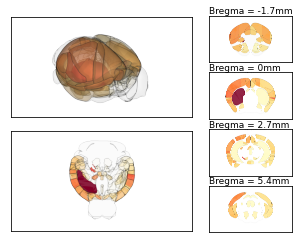

In [25]:
from pylab import *
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

list_coor = [-1700, 0, +2700, +4040] # Bregma corresponding coordinates
image=[]
for section in list_coor:
    Cor = Image.open("../Screenshot_Brainrender/50um_Coro_Breg_{}_mm.png".format(section/1000))
    image.append(Cor)

hor = Image.open("../Screenshot_Brainrender/50um_Horizontal_New.png")
whole = Image.open("../Screenshot_Brainrender/50um_Whole_New.png")

G = gridspec.GridSpec(nrows=4, ncols=3,left=0.25)

axes_1 = subplot(G[0:2, 0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)
plt.imshow(whole)

axes_2 = subplot(G[2:4,0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)
plt.imshow(hor)

axes_3 = subplot(G[0, 2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 1.7mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[0])

axes_4 = subplot(G[1,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 0mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[1])

axes_5 = subplot(G[2,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = -2.7mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[2])


axes_6 = subplot(G[3,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = -5.4mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[3])

plt.savefig('../Screenshot_Brainrender/Summary_figure.png', dpi=300)
plt.savefig('../Screenshot_Brainrender/Summary_figure.pdf', dpi=300)
plt.show()

# Different MPI and Seeding

# a) Seed = CPU

In [3]:
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates
timepoints = [1,3,6]
for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(title="-Coronal section Bregma {} mm -50um thickness- Seed = CPu - MPI {}".format(section/1000,t), inset=False,screenshots_folder="../Screenshot_Brainrender/CPu_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (24465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}

        # Add brain regions
        for r in data_cpu.index:

            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [0.4, 0.4, 0.4]
        brainrender.settings.OFFSCREEN = True
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.screenshot(name="50um_CPu_MPI{}_Breg_{}_mm".format(t,section/1000), scale = 3)

  0%|          | 0/3 [00:04<?, ?it/s]


NameError: name 'data_cpu' is not defined

# b) Seed = SNc

In [4]:
from vedo import embedWindow
embedWindow(None)
from tqdm import tqdm
from brainrender import Scene
import brainrender
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

cmap = plt.get_cmap('Reds')

data_sn = pd.read_csv('../output/predicted_pathology_iSN.csv')
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')

data_sn.head()

# Matching with BrainRender
for r in data_sn.index:
    
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values
        
for r in data_sn.index:
    
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left' 
        
# Normalization using Max and Min - Seed Pir
max_SN= np.max(data_sn['MPI6'])
min_SN = np.min(data_sn['MPI1'])

data_sn['MPI6'] = (data_sn['MPI6'] - min_SN) / (max_SN - min_SN)
data_sn['MPI3'] = (data_sn['MPI3'] - min_SN) / (max_SN - min_SN)
data_sn['MPI1'] = (data_sn['MPI1'] - min_SN) / (max_SN - min_SN)
data_sn = data_sn.dropna()

data_sn.head()
#list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates
list_coor = [-2100, -1080, +1360, +2820, +4500] # Bregma corresponding coordinates

timepoints = [1,3,6]
for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender/SN_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (25465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}

        # Add brain regions
        for r in data_sn.index:

            region_to_plot = data_sn.loc[r, "br_regions"]
            color = cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_sn.loc[r, 'hem'], silhouette=True) #alpha=data_cpu.loc[r, 'MPI{}'.format(t)]


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [0.4, 0.4, 0.4]
        brainrender.settings.OFFSCREEN = True
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.screenshot(name="50um_SNc_MPI{}_Breg_{}_mm".format(t,section/1000), scale = 3)
        img_totranspose = Image.open("../Screenshot_Brainrender\SN_MPIs/50um_SNc_MPI{}_Breg_{}_mm.png".format(t,section/1000))
        img_totranspose = img_totranspose.transpose(Image.FLIP_LEFT_RIGHT)
        img_totranspose.save("../Screenshot_Brainrender\SN_MPIs/50um_SNc_MPI{}_Breg_{}_mm.png".format(t,section/1000))
#         title="-Coronal section Bregma {} mm -50um thickness- Seed = SN - MPI {}".format(-section/1000,t),
        scene.close()

  0%|          | 0/3 [00:00<?, ?it/s]

Saving new screenshot at 50um_SNc_MPI1_Breg_- 2. 1_mm.png

Saving new screenshot at 50um_SNc_MPI1_Breg_- 1. 08_mm.png

Saving new screenshot at 50um_SNc_MPI1_Breg_1.36_mm.png

Saving new screenshot at 50um_SNc_MPI1_Breg_2.82_mm.png

Saving new screenshot at 50um_SNc_MPI1_Breg_4.5_mm.png

 33%|███▎      | 1/3 [01:05<02:11, 65.94s/it]

Saving new screenshot at 50um_SNc_MPI3_Breg_- 2. 1_mm.png

Saving new screenshot at 50um_SNc_MPI3_Breg_- 1. 08_mm.png

Saving new screenshot at 50um_SNc_MPI3_Breg_1.36_mm.png

Saving new screenshot at 50um_SNc_MPI3_Breg_2.82_mm.png

Saving new screenshot at 50um_SNc_MPI3_Breg_4.5_mm.png

 67%|██████▋   | 2/3 [02:07<01:04, 64.58s/it]

Saving new screenshot at 50um_SNc_MPI6_Breg_- 2. 1_mm.png

Saving new screenshot at 50um_SNc_MPI6_Breg_- 1. 08_mm.png

Saving new screenshot at 50um_SNc_MPI6_Breg_1.36_mm.png

Saving new screenshot at 50um_SNc_MPI6_Breg_2.82_mm.png

Saving new screenshot at 50um_SNc_MPI6_Breg_4.5_mm.png

100%|██████████| 3/3 [03:08<00:00, 62.90s/it]


# c) Seed = Pir

In [5]:
from vedo import embedWindow
embedWindow(None)

from brainrender import Scene
import brainrender
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.get_cmap('Reds')

data_pir = pd.read_csv('../output/predicted_pathology_iPir.csv')
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')

data_pir.head()

# Matching with BrainRender
for r in data_pir.index:
    
    names = reg_names[reg_names['ROInames'] == data_pir.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_pir.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_pir.loc[r, 'br_regions'] = names.values
        
for r in data_pir.index:
    
    if data_pir.loc[r, 'regions'][0] == 'i':
        data_pir.loc[r, 'hem'] = 'right'
    elif data_pir.loc[r, 'regions'][0] == 'c':
        data_pir.loc[r, 'hem'] = 'left' 
        
# Normalization using Max and Min - Seed Pir
max_Pir= np.max(data_pir['MPI6'])
min_Pir = np.min(data_pir['MPI1'])

data_pir['MPI6'] = (data_pir['MPI6'] - min_Pir) / (max_Pir - min_Pir)
data_pir['MPI3'] = (data_pir['MPI3'] - min_Pir) / (max_Pir - min_Pir)
data_pir['MPI1'] = (data_pir['MPI1'] - min_Pir) / (max_Pir - min_Pir)
data_pir = data_pir.dropna()

data_pir.head()

from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-2100, -1080, +1360, +2820, +4500] # Bregma corresponding coordinates
#list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates

timepoints = [1,3,6]

# for r in data_pir.index:
#      if data_pir.loc[r, "br_regions"] == "PIR" and data_pir.loc[r,'hem'] == 'right':
#             data_pir = data_pir.drop(r)
#             print("Dropping Seed")

for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender/PIR_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (24465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}

        # Add brain regions
        for r in data_pir.index:

            region_to_plot = data_pir.loc[r, "br_regions"]
            color = cmap(100*data_pir.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_pir.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_pir.loc[r, 'hem'], silhouette=True) #alpha=data_cpu.loc[r, 'MPI{}'.format(t)]
        
        #scene.add_brain_region("PIR", color="blue", alpha=1, hemisphere='right', silhouette=True)


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [0.4, 0.4, 0.4]
        brainrender.settings.OFFSCREEN = True
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.screenshot(name="50um_Pir_MPI{}_Breg_{}_mm".format(t,-section/1000), scale = 3)
        img_totranspose = Image.open("../Screenshot_Brainrender\PIR_MPIs/50um_Pir_MPI{}_Breg_{}_mm.png".format(t,-section/1000))
        img_totranspose = img_totranspose.transpose(Image.FLIP_LEFT_RIGHT)
        img_totranspose.save("../Screenshot_Brainrender\PIR_MPIs/50um_Pir_MPI{}_Breg_{}_mm.png".format(t,-section/1000))
        scene.close()

  0%|          | 0/3 [00:00<?, ?it/s]

Saving new screenshot at 50um_Pir_MPI1_Breg_2.1_mm.png

Saving new screenshot at 50um_Pir_MPI1_Breg_1.08_mm.png

Saving new screenshot at 50um_Pir_MPI1_Breg_- 1. 36_mm.png

Saving new screenshot at 50um_Pir_MPI1_Breg_- 2. 82_mm.png

Saving new screenshot at 50um_Pir_MPI1_Breg_- 4. 5_mm.png

 33%|███▎      | 1/3 [00:59<01:58, 59.15s/it]

Saving new screenshot at 50um_Pir_MPI3_Breg_2.1_mm.png

Saving new screenshot at 50um_Pir_MPI3_Breg_1.08_mm.png

Saving new screenshot at 50um_Pir_MPI3_Breg_- 1. 36_mm.png

Saving new screenshot at 50um_Pir_MPI3_Breg_- 2. 82_mm.png

Saving new screenshot at 50um_Pir_MPI3_Breg_- 4. 5_mm.png

 67%|██████▋   | 2/3 [02:01<01:00, 60.12s/it]

Saving new screenshot at 50um_Pir_MPI6_Breg_2.1_mm.png

Saving new screenshot at 50um_Pir_MPI6_Breg_1.08_mm.png

Saving new screenshot at 50um_Pir_MPI6_Breg_- 1. 36_mm.png

Saving new screenshot at 50um_Pir_MPI6_Breg_- 2. 82_mm.png

Saving new screenshot at 50um_Pir_MPI6_Breg_- 4. 5_mm.png

100%|██████████| 3/3 [03:02<00:00, 60.69s/it]


In [75]:
# Screenshot of Horizontal section
#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm
cmap = plt.get_cmap('YlOrRd')

scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender/PIR_MPIs")
top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

# Add brain regions
for r in data_pir.index:

    region_to_plot = data_pir.loc[r, "br_regions"]
    color = cmap(data_pir.loc[r, 'MPI6'])[:3]
    #alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    scene.add_brain_region(region_to_plot, color=color, alpha=data_pir.loc[r, 'MPI6'], hemisphere=data_pir.loc[r, 'hem'], silhouette=True)

cp = scene.atlas.get_region("CP")
plane = scene.atlas.get_plane(pos=cp.centerOfMass(), plane="horizontal", norm=(0, 1, 0), alpha=1)
scene.slice(plane=plane, close_actors=True)


brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.15
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False
brainrender.settings.SHOW_AXES = False
brainrender.settings.BACKGROUND_COLOR = "White"
scene.render(atlas_name='allen_mouse_50um', camera=top_side_camera, zoom=1.5)
#scene.screenshot(name="TESThori".format(section/1000), scale = 3)


Saving new screenshot at brainrender_screenshot_20210304_160946.png

Saving new screenshot at brainrender_screenshot_20210304_160951.png

In [83]:
from brainrender import Scene
from tqdm import tqdm

# Create a brainrender scene
scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender/PIR_MPIs")
brainrender.settings.SHOW_AXES = False


# Add brain regions Scene 1
for r in data_pir.index:
    
    region_to_plot = data_pir.loc[r, "br_regions"]
    color = cmap(data_pir.loc[r, 'MPI6'])[:3]
    alpha =  cmap(data_pir.loc[r, 'MPI6'])[:3]
    
    #scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6']) 
    scene.add_brain_region(region_to_plot, color=color, alpha=0.5, hemisphere=data_pir.loc[r, 'hem'], silhouette=True) #Alpha varies according to values
    

brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.3
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False

scene.render(atlas_name='allen_mouse_50um', zoom=1.5, silhouette=None)

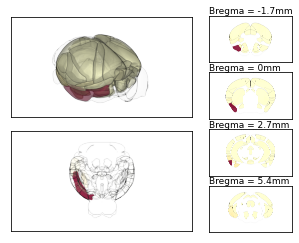

In [82]:
from pylab import *
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

list_coor = [-1700, 0, +2700, +4040] # Bregma corresponding coordinates
image=[]
for section in list_coor:
    Cor = Image.open("../Screenshot_Brainrender/PIR_MPIs/50um_Pir_MPI6_Breg_{}_mm.png".format(section/1000))
    image.append(Cor)

hor = Image.open("../Screenshot_Brainrender/PIR_MPIs/50_um_Pir.png")
whole = Image.open("../Screenshot_Brainrender/PIR_MPIs/50um_whole_Pir.png")

G = gridspec.GridSpec(nrows=4, ncols=3,left=0.25)

axes_1 = subplot(G[0:2, 0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)
plt.imshow(whole)

axes_2 = subplot(G[2:4,0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)
plt.imshow(hor)

axes_3 = subplot(G[0, 2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = -1.7mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[0])

axes_4 = subplot(G[1,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 0mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[1])

axes_5 = subplot(G[2,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 2.7mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[2])


axes_6 = subplot(G[3,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 5.4mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[3])

plt.savefig('../Screenshot_Brainrender/Summary_figure_Pir.png', dpi=300)
plt.savefig('../Screenshot_Brainrender/Summary_figure_Pir.pdf', dpi=300)
plt.show()

 # HTML Export - Seed SN

In [21]:
from brainrender import Scene, atlas
from tqdm import tqdm

cmap = plt.get_cmap('YlOrRd')
list_coor = [-1700, 0, +2700, +3000, +4040] # Bregma corresponding coordinates
timepoints = [1,3,6]

data_sn = pd.read_csv('../output/predicted_pathology_seedSN.csv')
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')
for r in data_sn.index:
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values   
for r in data_sn.index:
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left'
data_sn = data_sn.dropna()

# Normalization using max and min - Seed SN
max_SN= np.max(data_sn['MPI6'])
min_SN = np.min(data_sn['MPI1'])

data_sn['MPI6'] = (data_sn['MPI6'] - min_SN) / (max_SN - min_SN)
data_sn['MPI3'] = (data_sn['MPI3'] - min_SN) / (max_SN - min_SN)
data_sn['MPI1'] = (data_sn['MPI1'] - min_SN) / (max_SN - min_SN)

for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(title="-Coronal section Bregma {} mm -50um thickness- Seed = SN - MPI {}".format(section/1000,t), inset=False,screenshots_folder="../Screenshot_Brainrender/SN_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (24465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}
        

        # Add brain regions
        for r in data_sn.index:

            region_to_plot = data_sn.loc[r, "br_regions"]
            color = cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_sn.loc[r, 'hem'], silhouette=True) #alpha=data_cpu.loc[r, 'MPI{}'.format(t)]


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [1, 1, 1]
        brainrender.settings.OFFSCREEN = True
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.export('../html_BrainRender/50um_SNc_MPI{}_Breg_{}_mm.html'.format(t,section/1000))

  0%|          | 0/3 [00:00<?, ?it/s]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI1_Breg_- 1. 7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI1_Breg_0.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI1_Breg_2.7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI1_Breg_3.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI1_Breg_4.04_mm.html

 33%|███▎      | 1/3 [01:03<02:07, 63.92s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI3_Breg_- 1. 7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI3_Breg_0.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI3_Breg_2.7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI3_Breg_3.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI3_Breg_4.04_mm.html

 67%|██████▋   | 2/3 [02:08<01:04, 64.21s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI6_Breg_- 1. 7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI6_Breg_0.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI6_Breg_2.7_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI6_Breg_3.0_mm.html

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\50um_SNc_MPI6_Breg_4.04_mm.html

100%|██████████| 3/3 [03:09<00:00, 63.24s/it]


In [22]:
from brainrender import Scene, atlas
from tqdm import tqdm
timepoints =[1,3,6]
cmap = plt.get_cmap('YlOrRd')

top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

data_sn = pd.read_csv('../output/predicted_pathology_seedSN.csv')
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')
for r in data_sn.index:
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values   
for r in data_sn.index:
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left'
data_sn = data_sn.dropna()

# Normalization using MPI6 - Seed SN
max_SN= np.max(data_sn['MPI6'])
min_SN = np.min(data_sn['MPI1'])

data_sn['MPI6'] = (data_sn['MPI6'] - min_SN) / (max_SN - min_SN)
data_sn['MPI3'] = (data_sn['MPI3'] - min_SN) / (max_SN - min_SN)
data_sn['MPI1'] = (data_sn['MPI1'] - min_SN) / (max_SN - min_SN)

for r in data_sn.index:
     if data_sn.loc[r, "br_regions"] == "SNc" and data_sn.loc[r,'hem'] == 'right':
            data_sn = data_sn.drop(r)
            print("Dropping Seed")

for t in tqdm(timepoints):
    scene = Scene(inset=True)
    for r in data_sn.index:
        region_to_plot = data_sn.loc[r, "br_regions"]
        color = cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
        alpha =  cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=data_sn.loc[r, 'MPI{}'.format(t)], hemisphere=data_sn.loc[r, 'hem'], silhouette=True)
        
    scene.add_brain_region("SNc", color="blue", alpha=1, hemisphere='right', silhouette=True)
    cp = scene.atlas.get_region("CP")
    plane = scene.atlas.get_plane(pos=cp.centerOfMass(), plane="horizontal", norm=(0, 1, 0), alpha=1)
    scene.slice(plane=plane, close_actors=True)


    brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= top_side_camera, zoom=1.5)
    scene.export('../html_BrainRender/Horizontal_SN_MPI_{}_Atlas_50um.html'.format(t))

Dropping Seed


  0%|          | 0/3 [00:00<?, ?it/s]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Horizontal_SN_MPI_1_Atlas_50um.html

 33%|███▎      | 1/3 [00:17<00:34, 17.29s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Horizontal_SN_MPI_3_Atlas_50um.html

 67%|██████▋   | 2/3 [00:31<00:16, 16.34s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Horizontal_SN_MPI_6_Atlas_50um.html

100%|██████████| 3/3 [00:45<00:00, 15.19s/it]


In [9]:
from brainrender import Scene, atlas
from tqdm import tqdm
timepoints =[1,3,6]
cmap = plt.get_cmap('YlOrRd')

top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

data_sn = pd.read_csv('../output/predicted_pathology_seedSN.csv')
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')
for r in data_sn.index:
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values   
for r in data_sn.index:
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left'
data_sn = data_sn.dropna()

# Normalization using MPI6 - Seed SN
max_SN= np.max(data_sn['MPI6'])
min_SN = np.min(data_sn['MPI1'])

data_sn['MPI6'] = (data_sn['MPI6'] - min_SN) / (max_SN - min_SN)
data_sn['MPI3'] = (data_sn['MPI3'] - min_SN) / (max_SN - min_SN)
data_sn['MPI1'] = (data_sn['MPI1'] - min_SN) / (max_SN - min_SN)

for r in data_sn.index:
     if data_sn.loc[r, "br_regions"] == "SNc" and data_sn.loc[r,'hem'] == 'right':
            data_sn = data_sn.drop(r)
            print("Dropping Seed")

for t in tqdm(timepoints):
    scene = Scene(inset=True)
    for r in data_sn.index:
        region_to_plot = data_sn.loc[r, "br_regions"]
        color = cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
        alpha =  cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=data_sn.loc[r, 'MPI{}'.format(t)], hemisphere=data_sn.loc[r, 'hem'], silhouette=True)
        
    scene.add_brain_region("SNc", color="blue", alpha=1, hemisphere='right', silhouette=True)


    brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.1
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= top_side_camera, zoom=1.5)
    scene.export('../html_BrainRender/Whole_SN_MPI_{}_Atlas_50um.html'.format(t))

Dropping Seed


  0%|          | 0/3 [00:00<?, ?it/s]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Whole_SN_MPI_1_Atlas_50um.html

 33%|███▎      | 1/3 [00:17<00:35, 17.70s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Whole_SN_MPI_3_Atlas_50um.html

 67%|██████▋   | 2/3 [00:34<00:17, 17.57s/it]

The brainrender scene has been exported for web. The results are saved at 
..\html_BrainRender\Whole_SN_MPI_6_Atlas_50um.html

100%|██████████| 3/3 [00:52<00:00, 17.61s/it]
